# Introduction

### How much do fruits cost in the United States? 
The data in this project is taken from the Economic Research Service in the U.S. Department of Agriculture. This project analyzes the cost of fruits in the U.S. using USDA Economic Research Service (ERS) data averages of 2013, 2016, 2020, and 2022. Prices are reported per pound and per edible cup equivalent, based on retail scanner data from various stores. The goal is to understand whether food prices are a barrier to meeting federal dietary guidelines, as many Americans fall short in consuming enough fruits and vegetables.

### Data Exploration

In [395]:
# Import libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np

In [396]:
# Import data from github save
df_raw = pd.read_csv('https://raw.githubusercontent.com/evanskaylie/DATA602/refs/heads/main/Fruit-Prices-2022.csv')

In [397]:
# Summary Statistics
# means, medians, quartiles, missing value information (no missing values) 
df_raw.describe()

,RetailPrice,Yield,CupEquivalentSize,CupEquivalentPrice
count,62.000000,62.000000,62.000000,62.000000
mean,2.994571,0.876129,1.704984,1.065056
std,2.269393,0.174979,2.949262,0.578325
min,0.382000,0.460000,0.123200,0.242900
25%,1.364225,0.722500,0.322450,0.639300
50%,2.159250,0.980000,0.363800,1.008250
75%,4.116525,1.000000,0.540100,1.353475
max,10.303500,1.000000,8.000000,3.555800


### Data Wrangling

In [399]:
# Take a look at the actual data values for each column
df_raw.head()

,Fruit,Form,RetailPrice,RetailPriceUnit,Yield,CupEquivalentSize,CupEquivalentUnit,CupEquivalentPrice
0,Apples,Fresh,1.8541,per pound,0.90,0.2425,pounds,0.4996
1,"Apples, applesauce",Canned,1.1705,per pound,1.00,0.5401,pounds,0.6323
2,"Apples, ready-to-drink",Juice,0.8699,per pint,1.00,8.0000,fluid ounces,0.4349
3,"Apples, frozen concentrate",Juice,0.6086,per pint,1.00,8.0000,fluid ounces,0.3043
4,Apricots,Fresh,3.6162,per pound,0.93,0.3638,pounds,1.4145


In [400]:
# Here, the most important dollar value comes from CupEquivalentPrice, as that is the most standardized
fruit_values = df_raw[["Fruit", "Form", "CupEquivalentPrice"]]
fruit_values.head()

,Fruit,Form,CupEquivalentPrice
0,Apples,Fresh,0.4996
1,"Apples, applesauce",Canned,0.6323
2,"Apples, ready-to-drink",Juice,0.4349
3,"Apples, frozen concentrate",Juice,0.3043
4,Apricots,Fresh,1.4145


In [401]:
# Now, lets widen the data frame. Each row should be a Fruit, with columns for Form with values of CupEquivalentPrice

# Pivot the DataFrame
wide_fruit_df = df_raw.pivot(index="Fruit", columns="Form", values="CupEquivalentPrice")

# Reset the index if desired
wide_fruit_df.reset_index(inplace=True)

# Function to split the fruit name and descriptor, handling both commas and parentheses
def split_fruit_name(fruit):
    match = re.match(r"^(.*?)(?:\s*\((.*?)\))?(?:\s*,\s*(.*))?$", fruit)
    if match:
        main_fruit = match.group(1).strip()  # Capture the main fruit name
        descriptor = None
        
        # Combine descriptor from parentheses and after the comma
        if match.group(2):
            descriptor = match.group(2).strip()  # Descriptor inside parentheses
        if match.group(3):
            if descriptor:
                descriptor += ", " + match.group(3).strip()  # Combine with comma descriptor
            else:
                descriptor = match.group(3).strip()
        
        return main_fruit, descriptor
    return fruit, None  # If no match, return the fruit name and None for descriptor

# Apply the function and create new columns
wide_fruit_df[['Fruit', 'Descriptor']] = wide_fruit_df['Fruit'].apply(lambda x: pd.Series(split_fruit_name(x)))

# Take a glimpse
wide_fruit_df.head()

Form,Fruit,Canned,Dried,Fresh,Frozen,Juice,Descriptor
0,Apples,NaN,NaN,0.4996,NaN,NaN,None
1,Apples,0.6323,NaN,NaN,NaN,NaN,applesauce
2,Apples,NaN,NaN,NaN,NaN,0.3043,frozen concentrate
3,Apples,NaN,NaN,NaN,NaN,0.4349,ready-to-drink
4,Apricots,NaN,1.0978,1.4145,NaN,NaN,None


In [402]:
# Now let's combine the fruits all into one row each. Any duplicate values for the form will be averaged.

# Drop the Descriptor column, as it will not be helpful for this form
fruit_cleaned = wide_fruit_df.drop(columns=["Descriptor"])

# Group by Fruit and average the values for each Form
fruit_df = fruit_cleaned.groupby("Fruit", as_index=False).mean(numeric_only=True)

# Take a look at all the data
fruit_df

Form,Fruit,Canned,Dried,Fresh,Frozen,Juice
0,Apples,0.63230,NaN,0.4996,NaN,0.36960
1,Apricots,1.26200,1.0978,1.4145,NaN,NaN
2,Bananas,NaN,NaN,0.3085,NaN,NaN
3,Berries,NaN,NaN,NaN,1.4112,NaN
4,Blackberries,NaN,NaN,2.2471,1.5965,NaN
5,Blueberries,NaN,NaN,1.3990,1.2636,NaN
6,Cantaloupe,NaN,NaN,0.5528,NaN,NaN
7,Cherries,3.55580,NaN,1.7321,NaN,NaN
8,Clementines,NaN,NaN,0.9507,NaN,NaN
9,Cranberries,NaN,0.6260,NaN,NaN,NaN


Looks great! Now, let's make some visualizations.

# Visualizations

## Part 1

#### Matplotlib Bar Plot:

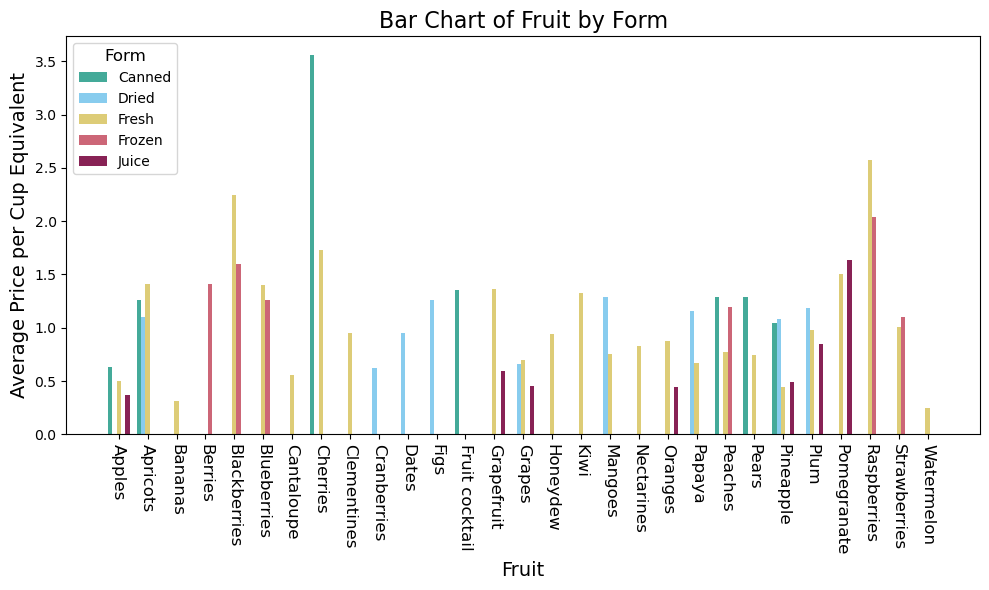

In [407]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Set the bar width
bar_width = 0.15 

# List of forms and colors, color-blind friendly palette
forms = ['Canned', 'Dried', 'Fresh', 'Frozen', 'Juice']
colors = ['#44AA99', '#88CCEE', '#DDCC77', '#CC6677', '#882255']

# Number of fruits (the x-axis positions)
x = np.arange(len(fruit_df))

# Plot each form as separate bars, offsetting each form by adjusting the position on the x-axis
for i, (form, color) in enumerate(zip(forms, colors)):
    ax.bar(x + i * bar_width, fruit_df[form].fillna(0), bar_width, label=form, color=color)

# Customizing the legend position and font size
ax.legend(title="Form", loc='upper left', fontsize='medium', title_fontsize='large')

# Adding labels and title
ax.set_xlabel('Fruit', fontsize=14)
ax.set_ylabel('Average Price per Cup Equivalent', fontsize=14)
ax.set_title('Bar Chart of Fruit by Form', fontsize=16)

# Adjust x-tick labels to display fruit names properly
ax.set_xticks(x + bar_width * (len(forms) - 1) / 2)  # Adjust position of x-ticks to center
ax.set_xticklabels(fruit_df['Fruit'], rotation=270, fontsize=12)  # Rotate labels for readability

# Show the plot
plt.tight_layout()
plt.show()

#### Matplotlib Bar Plot Visualization: Bar Chart of Fruit by Form
This visualization compares different fruits and their varied forms by the standardized average price per cup equivalent amount. We can see that not all fruit types are consistantly greater than other types within fruit groups or overall. Also, we can see that the three most expensive per cup are canned cherries, fresh raspberries and fresh blackberries.

##### Properties used: 
- Use and change a legend position (upper left)
- Change a legend font size (medium)
- Change the title and x/y labels (title: Bar Chart of Fruit by Form, x: Fruit, y: Average Price per Cup Equivalent)


#### Matplotlib Box Plot:

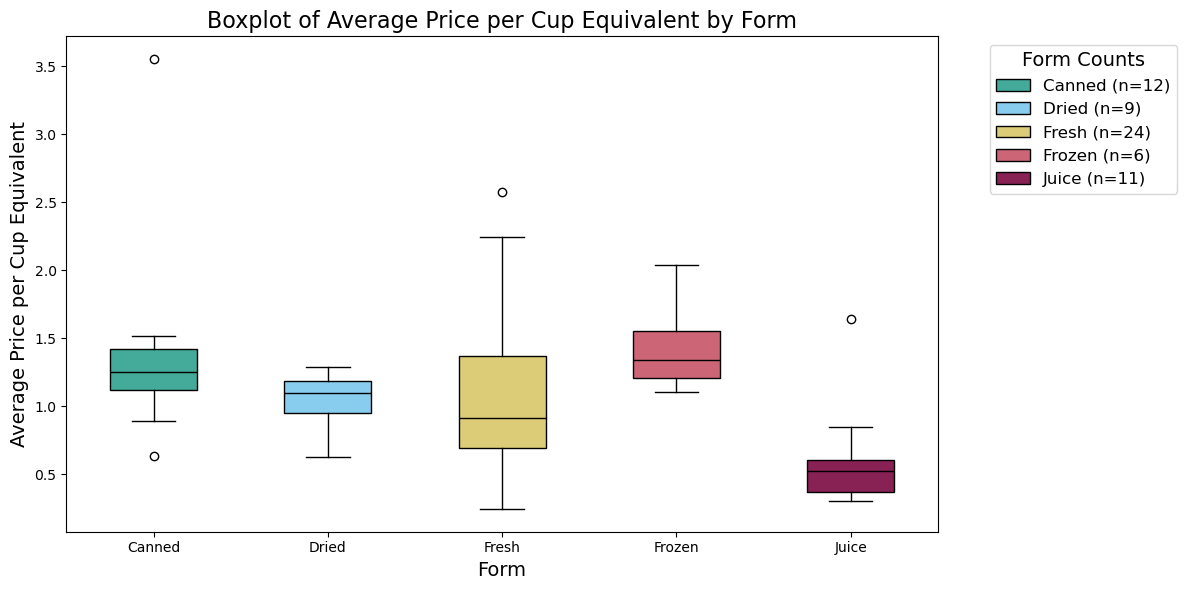

In [410]:
# List of forms and colors, color-blind friendly palette
forms = ['Canned', 'Dried', 'Fresh', 'Frozen', 'Juice']
colors = ['#44AA99', '#88CCEE', '#DDCC77', '#CC6677', '#882255']

# Group data by 'Form' to create the boxplot for each form
form_groups = [fruit_values[fruit_values['Form'] == form]['CupEquivalentPrice'] for form in forms]

# Count the number of observations for each form
form_counts = [fruit_values[fruit_values['Form'] == form].shape[0] for form in forms]

# Create a boxplot
plt.figure(figsize=(12, 6))

# Plot the boxplot with a default color, which will be replaced later
boxplot = plt.boxplot(form_groups, tick_labels=forms, patch_artist=True,
                      medianprops=dict(color='black'))

# Customize each box color by iterating over the 'boxes' in the boxplot
for i, box in enumerate(boxplot['boxes']):
    box.set_facecolor(colors[i])

# Customizing axis labels and title
plt.xlabel('Form', fontsize=14)
plt.ylabel('Average Price per Cup Equivalent', fontsize=14)
plt.title('Boxplot of Average Price per Cup Equivalent by Form', fontsize=16)

# Adjusting the x-axis label size
plt.xticks(fontsize=10)

# Adding the legend with counts
legend_labels = [f'{form} (n={count})' for form, count in zip(forms, form_counts)]
plt.legend(legend_labels, loc='upper left', fontsize=12, title="Form Counts", title_fontsize=14, bbox_to_anchor=(1.05, 1))

# Show the plot
plt.tight_layout()
plt.show()

#### Matplotlib Box Plot Visualization: Boxplot of Average Price per Cup Equivalent by Form
This visualization compares different forms of fruit by the IQRs for standardized average price per cup equivalent amount. It looks like fresh fruits have the widest 25%-75% range. Also, we see that canned cherry value at the top left which we recognize from the barplot. It looks like the juice form of these fruits are the most accessable overall by price.

##### Properties used: 
- Change size of axis Labels (fontsize 10)
- Place a legend outside of the plot (to the right, contains counts of each form for boxplots)

## Part 2

#### Seaborn Bar Plot:


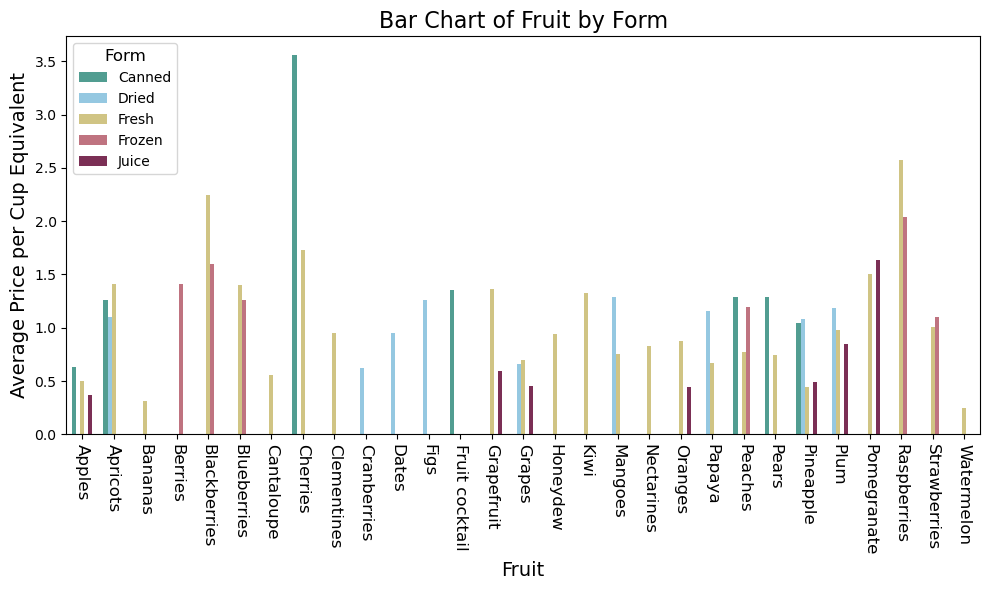

In [414]:
# Seaborn Bar Chart (with the legend inside the plot)
plt.figure(figsize=(10, 6))
bar_width = 0.65  # Bar width has to be a larger value than the matplotlib bar width

# Melt the dataframe to make it long-form for easier plotting with seaborn
melted_df = fruit_df.melt(id_vars=['Fruit'], value_vars=['Canned', 'Dried', 'Fresh', 'Frozen', 'Juice'], 
                          var_name='Form', value_name='CupEquivalentPrice')

# Seaborn Barplot (grouped bars)
sns.barplot(x='Fruit', y='CupEquivalentPrice', hue='Form', data=melted_df, 
            palette=['#44AA99', '#88CCEE', '#DDCC77', '#CC6677', '#882255'],
            width=bar_width)

# Customizing axis labels, title, and legend
plt.xlabel('Fruit', fontsize=14)
plt.ylabel('Average Price per Cup Equivalent', fontsize=14)
plt.title('Bar Chart of Fruit by Form', fontsize=16)
plt.xticks(rotation=270, fontsize=12)  # Rotate x labels for better readability

# Adjust legend position inside the plot
plt.legend(title="Form", loc='upper left', fontsize='medium', title_fontsize='large')

# Tight layout for better spacing
plt.tight_layout()
plt.show()

#### Seaborn Bar Plot Visualization: Bar Chart of Fruit by Form
The above visualization matches the matplotlib version. Again, we see the comparison of different fruits and their varied forms by the standardized average price per cup equivalent amount. We can see that not all fruit types are consistantly greater than other types within fruit groups or overall and that the three most expensive per cup are canned cherries, fresh raspberries and fresh blackberries.

##### Properties used: 
- Use and change a legend position (upper left)
- Change a legend font size (medium)
- Change the title and x/y labels (title: Bar Chart of Fruit by Form, x: Fruit, y: Average Price per Cup Equivalent)

#### Seaborn Box Plot:

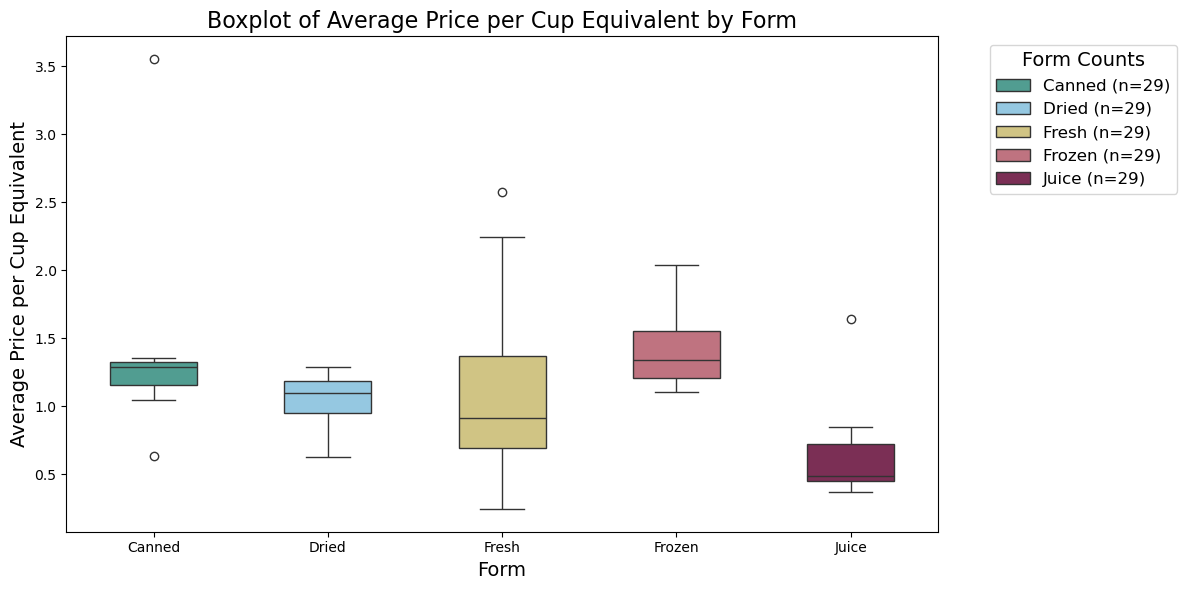

In [417]:
# Plotting Boxplot with Seaborn
plt.figure(figsize=(12, 6))

# Seaborn Boxplot
sns.boxplot(x='Form', y='CupEquivalentPrice', data=melted_df, 
            hue='Form', # Assigning 'Form' to hue to make the palette work without a warning
            palette=['#44AA99', '#88CCEE', '#DDCC77', '#CC6677', '#882255'], # Same colors as matplotlib box plots
            width=0.5)  # Make the boxes narrower to match the above matplotlib box plots

# Customizing axis labels, title, and legend
plt.xlabel('Form', fontsize=14)
plt.ylabel('Average Price per Cup Equivalent', fontsize=14)
plt.title('Boxplot of Average Price per Cup Equivalent by Form', fontsize=16)

# Adjusting the x-axis label size
plt.xticks(fontsize=10)

# Adding the legend outside of the plot with counts
form_counts = melted_df['Form'].value_counts()
legend_labels = [f'{form} (n={count})' for form, count in form_counts.items()]
plt.legend(legend_labels, loc='upper left', fontsize=12, title="Form Counts", title_fontsize=14, bbox_to_anchor=(1.05, 1))

# Tight layout for better spacing
plt.tight_layout()
plt.show()

#### Seaborn Box Plot Visualization: Boxplot of Average Price per Cup Equivalent by Form
This visualization mirrors the matplotlib boxplot above. Here again, different forms of fruit by the IQRs for standardized average price per cup equivalent amount are shown. The fresh form of fruits have the widest 25%-75% range. Also, we see that canned cherry value at the top left which we recognize from the barplot. It looks like the juice form of these fruits are the most accessable overall by price.

##### Properties used: 
- Change size of axis Labels (fontsize 10)
- Place a legend outside of the plot (to the right, contains counts of each form for boxplots)

## Part 3: 

In order to make the different versions line up, the seaborn bar widths needed to be much wider values than the matplotlib version to make them look the same. Also, the color palette values are the same, but they look much brighter on the matplotlib graphs and more dull in the seaborn graphs.

The code itself also has different elements. For instance, in matplotlib, the bar() function is used with explicit control over bar positions and widths, and it requires manually adjusting the x-tick labels to center them. In seaborn, the barplot() function is used, which automatically handles the positions and widths of the bars, but requires the data to be reshaped into long form to plot. Also, the handling of legends is different, as in matplotlib the legend is manually positioned using bbox_to_anchor, whereas in seaborn, it is controlled through the hue parameter for grouping, which influences the color and the legend placement automatically.

# Conclusions

### How much do fruits cost in the United States? 

The above visualizations paint a picture that helps answer this question. Overall, we see that some specific fruit forms are much more or less expensive than average. 

If price is the biggest factor in deciding which form to buy, then fruit juice is the best option. It makes sense that fruit juice is not as expensive as other options, as it has a long shelf life and a high concentration of water, making it less expensive to produce per unit. 

For fresh fruits, the lowest average cost fruits are apples, bananas, cantelope, pinneapple and watermelon, all with less than $0.60 per cup (cup equivilant). 